## Visualization of various impurities metrices

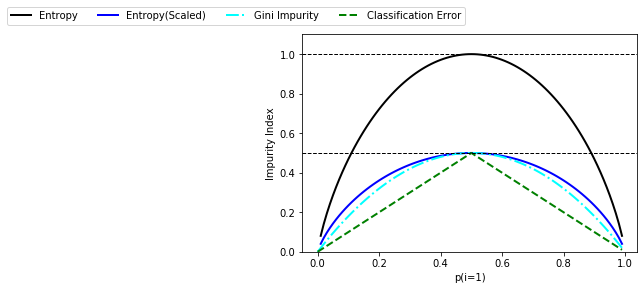

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def entropy(p):
    return -p * np.log2(p) - ( 1 - p) * np.log2(1 - p)
def gini(p):
    return (p) * (1 - (p)) + (1 - p)*(1 - (1 - p))
def error(p):
    return 1 - np.max([p , 1-p])
x = np.arange(0 , 1 , 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(p) for p in x ]
ax = plt.subplot(111)
for i , lab , ls , c in zip([ent , sc_ent , gini(x) , err ] ,
                         ['Entropy' , 'Entropy(Scaled)' , 'Gini Impurity' , 'Classification Error'],
                         ['-' , '-' , '-.' , '--'] , 
                         ['black' , 'blue' , 'cyan' , 'green']):
    ax.plot(x , i , label = lab , linestyle = ls , lw = 2 , color = c )
ax.legend(loc = 'best' , bbox_to_anchor = (0.5 , 1.15) , ncol = 5)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show() 

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X , y , classifier ,test_idx = None , resolution = 0.02):
    #setup marker generator and colormap
    markers = ('s' , 'x' , 'o' , '^' , 'v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surfaces
    x1_min , x1_max = X[: , 0].min() - 1 , X[: , 0].max() + 1
    x2_min , x2_max = X[: , 1].min() - 1 , X[: , 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , 
                            np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , z , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl , 0] , y = X[y == cl , 1],
                    alpha = 0.8 , c = colors[idx] , 
                    marker = markers[idx] , label = cl , edgecolor = 'black')
    
    #highlight test sample
    if test_idx:
        #plot all samples
        X_test , y_test = X[test_idx , :] , y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],                    
                c='', edgecolor='black', alpha=1.0,                    \
                linewidth=1, marker='o',                    
                s=100, label='test set')
    

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[: , (2 , 3)] 
y = iris.target
np.unique(y)

array([0, 1, 2])

In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1 , stratify = y)

## Decision Tree Classifier

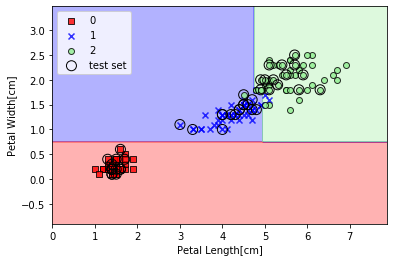

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini' , max_depth = 4 , random_state = 1)
tree.fit(X_train , y_train)
X_combined = np.vstack((X_train , X_test))
y_combined = np.hstack((y_train , y_test))
plot_decision_regions(X_combined , y_combined , classifier = tree , test_idx = range(105 , 150))
plt.xlabel('Petal Length[cm]')
plt.ylabel('Petal Width[cm]')
plt.legend(loc = 'upper left')
plt.show()

## Random Forest Classifier

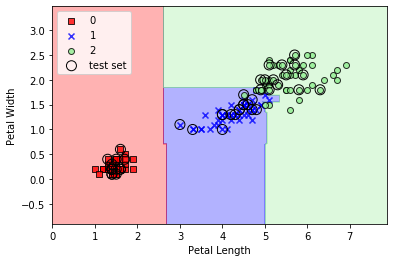

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini' , n_estimators = 25 , random_state = 1 , n_jobs = 2)
forest.fit(X_train , y_train)
plot_decision_regions(X_combined , y_combined , classifier = forest , test_idx = range(105 , 150))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()

## K-nearest neighbors- a lazy learning algorithm

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
X_combined_std = np.vstack((X_train_std , X_test_std))
y_combined = np.hstack((y_train , y_test))

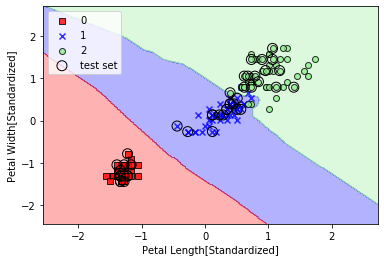

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5 , p = 2 , metric = 'minkowski' )
knn.fit(X_train_std , y_train)
plot_decision_regions(X_combined_std , y_combined , classifier = knn , test_idx = range(105 , 150))
plt.xlabel('Petal Length[Standardized]')
plt.ylabel('Petal Width[Standardized]')
plt.legend(loc = 'upper left')
plt.show()